In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import pytesseract

In [2]:
def show_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()

In [3]:
def rotation(rotImg,angle_rotation, koef):
    (h, w) = rotImg.shape[:2]
    center = (int(w / 2), int(h / 2))
    rotation_matrix = cv2.getRotationMatrix2D(center, angle_rotation, koef)
    rotated = cv2.warpAffine(rotImg, rotation_matrix, (w, h))
    return rotated

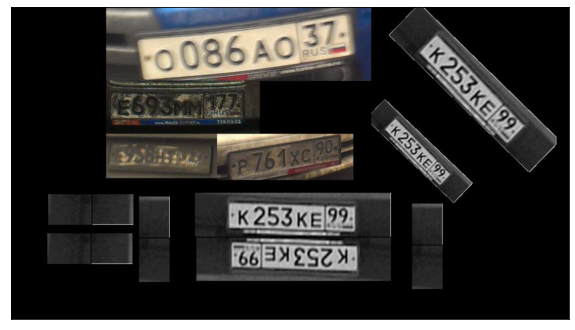

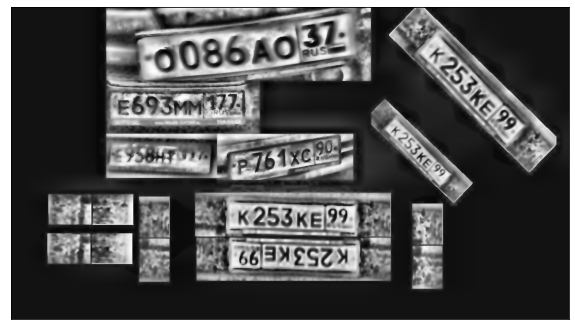

In [4]:
img = cv2.imread('img/car_plates.jpg')
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray_orig = gray.copy()
clahe = cv2.createCLAHE(clipLimit=10, tileGridSize=(20,20))
gray = clahe.apply(gray)
gray = cv2.bilateralFilter(clahe.apply(gray),9,75,75)
show_image(gray)

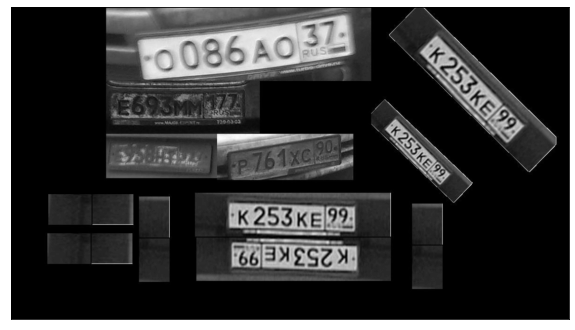

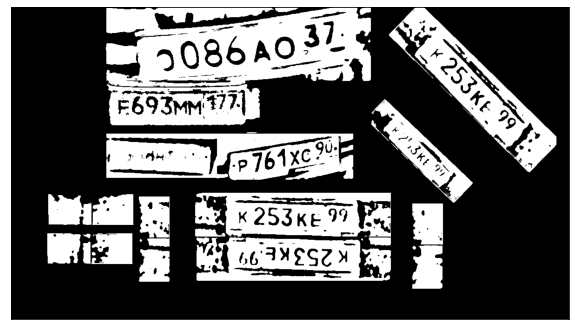

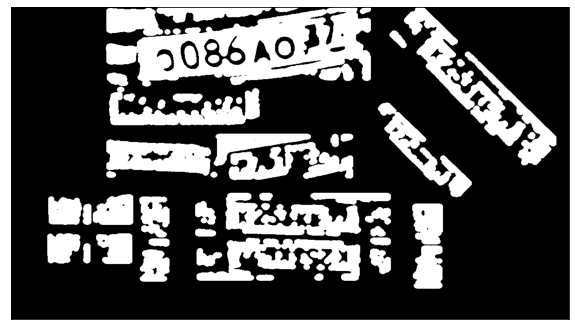

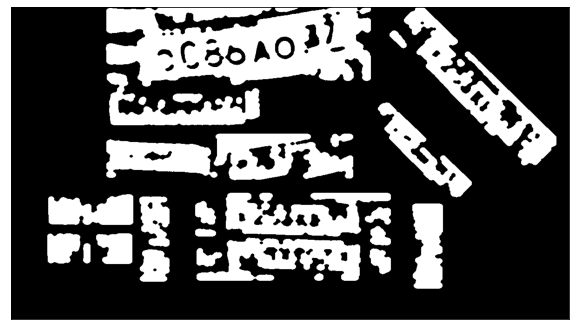

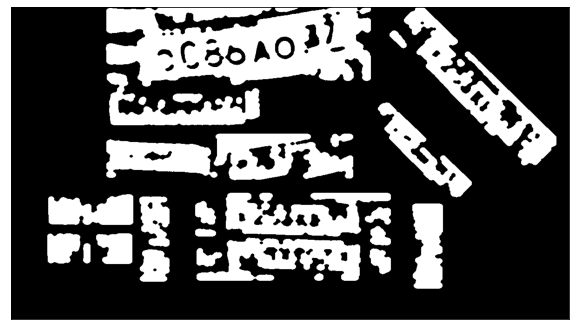

In [5]:
grayT = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
show_image(grayT)
clahe = cv2.createCLAHE(clipLimit=10, tileGridSize=(20,20))
gray_plates = clahe.apply(grayT)
gray_plates = cv2.bilateralFilter(gray_plates,9,50,50)
ret, gray_plates = cv2.threshold(gray_plates,0,255,cv2.THRESH_OTSU)
show_image(gray_plates)
gray_plates = cv2.morphologyEx(gray_plates, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13)))
show_image(gray_plates)
gray_plates = cv2.morphologyEx(gray_plates, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7)))
show_image(gray_plates)
contours, hierarchy = cv2.findContours(gray_plates, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
show_image(gray_plates)

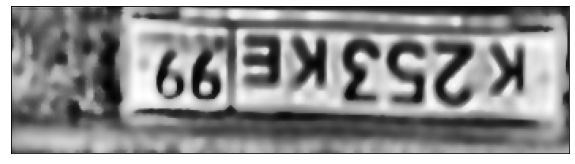

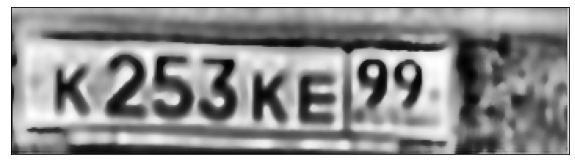

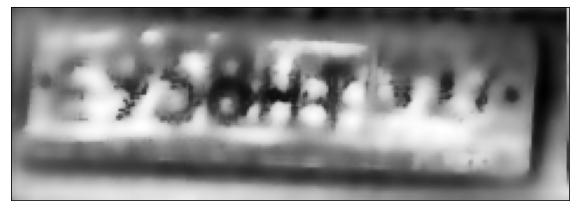

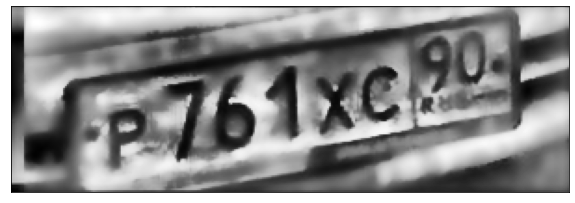

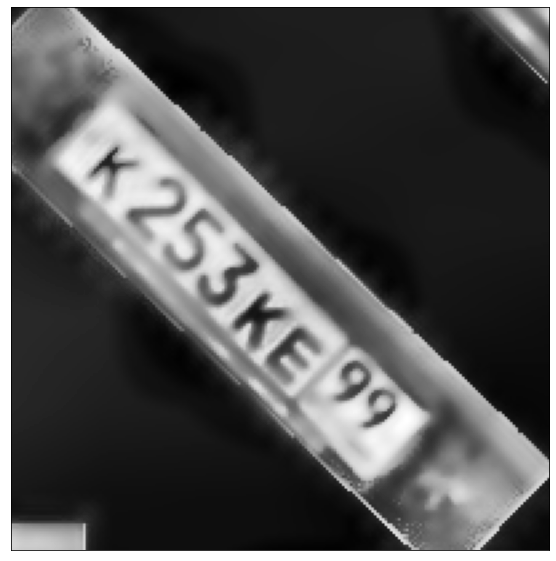

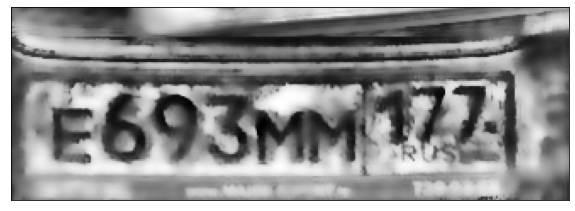

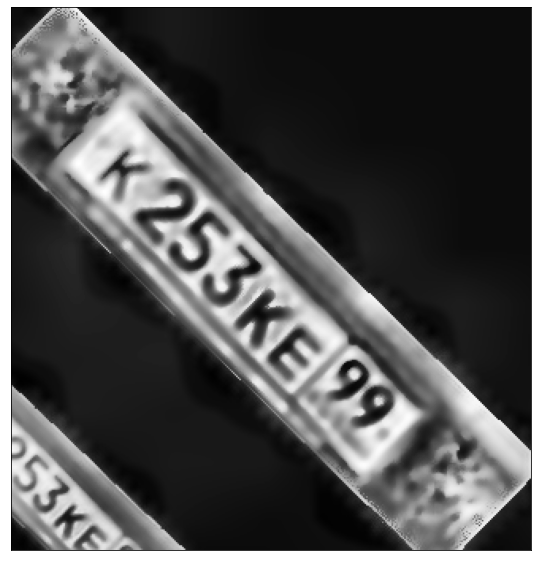

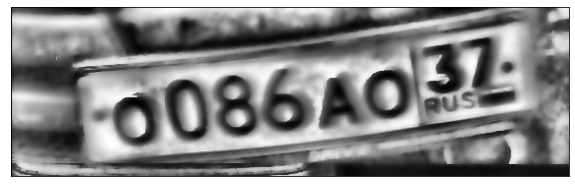

In [6]:
gray_edited = []
for c in contours:
    pl = cv2.contourArea(c)
    if (pl > 10000):
        x, y, w, h = cv2.boundingRect(c)
        ttt = gray[y:y + h, x:x + w]
        gray_edited.append(ttt)
        show_image(ttt)

In [7]:
gray_edited[0] = rotation(gray_edited[0],-180, 1)
gray_edited[4] = rotation(gray_edited[4],45, 1)
gray_edited[6] = rotation(gray_edited[6],45, 1)


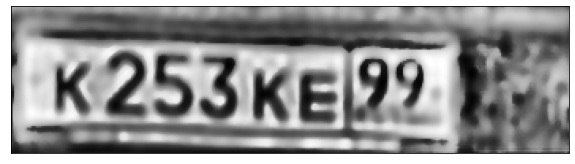

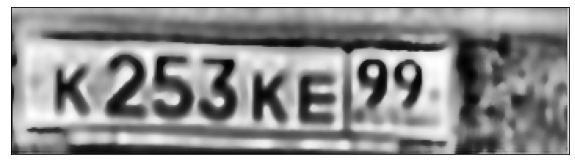

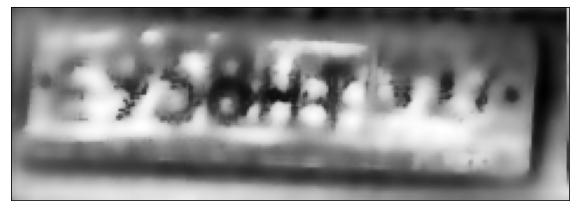

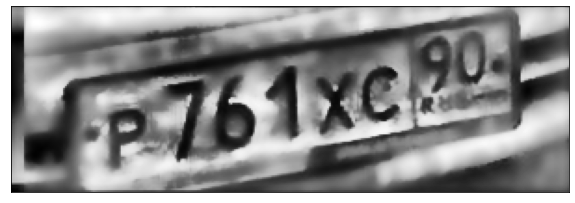

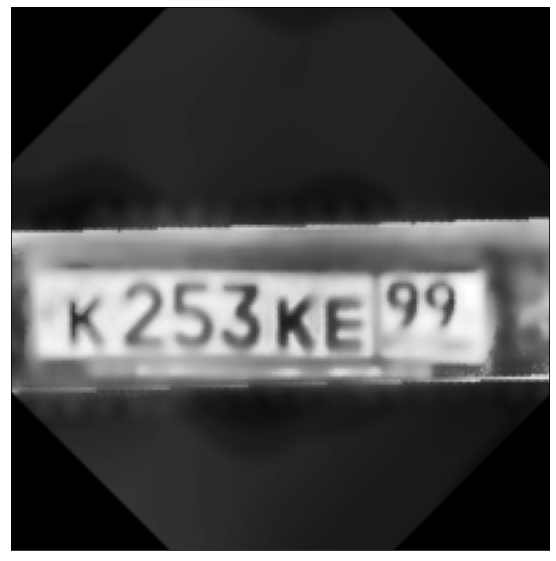

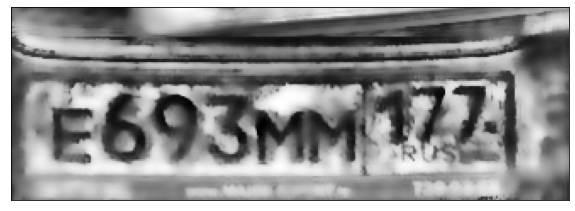

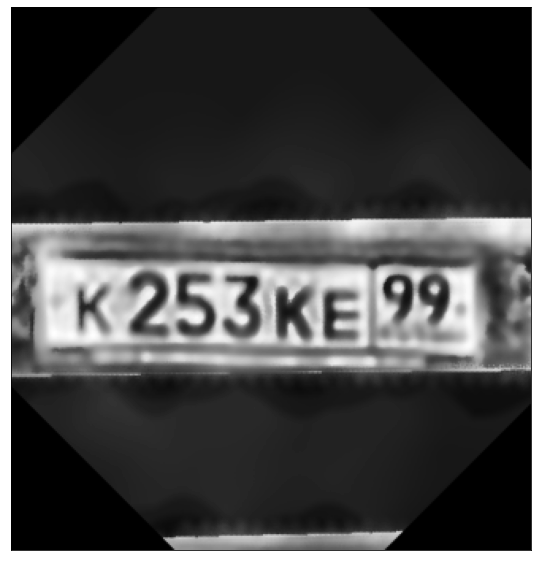

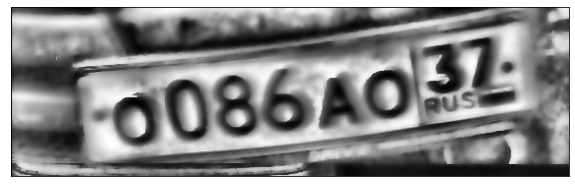

Найдено номеров:  8


In [8]:
for i in gray_edited:
    show_image(i)
print('Найдено номеров: ', len(gray_edited))